# Implementation of Logistic regression from scratch

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
x, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

print(x.shape, y.shape)

(50000, 15) (50000,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def initialize_weights(dim):
  w = np.zeros_like(dim)
  b = 0
  return w,b

In [6]:
dim=X_train[0]
w,b = initialize_weights(dim)

print('w =',(w)) 
print('b =',str(b)) 

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [8]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [9]:
def logloss(y_true,y_pred):  
  summation = 0

  for i in range(len(y_true)):
    
    summation += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
  
  
  loss = -1 * (1/len(y_true)) * summation
  
  return loss

In [11]:
def gradient_dw(x,y,w,b,alpha,N):
  dw = x * (y - sigmoid(np.dot(w,x) + b)) - ((alpha/N) * w)
  return dw

In [12]:
def gradient_db(x,y,w,b):
   db = y - sigmoid(np.dot(w,x) + b)
   return db

In [13]:

def custom_lr(X_train,y_train,X_test,y_test,epochs,alpha,eta):
  train_loss, test_loss = [], []


  w,b = initialize_weights(X_train[0])

  for i in range(epochs):
    
    train_prediction, test_prediction = [], []

    for j in range(len(X_train)):
      
      dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, len(X_train))
      db = gradient_db(X_train[j], y_train[j], w, b)

      w += (eta * dw)
      b += (eta * db)

    for train_datapoint in range(len(X_train)):
      
      train_prediction.append(sigmoid(np.dot(w, X_train[train_datapoint]) + b))
      
    loss_for_train = logloss(y_train, train_prediction)


    train_loss.append(loss_for_train) 

    for test_datapoint in range(len(X_test)):
      
      test_prediction.append(sigmoid(np.dot(w, X_test[test_datapoint]) + b))
      
    
    loss_for_test = logloss(y_test, test_prediction)
    
    test_loss.append(loss_for_test)
    

  return w,b,train_loss,test_loss 

In [15]:
alpha=0.0001 
eta=0.0001
epochs=15

w,b,log_loss_train,log_loss_test=custom_lr(X_train,y_train,X_test,y_test,epochs,alpha,eta)

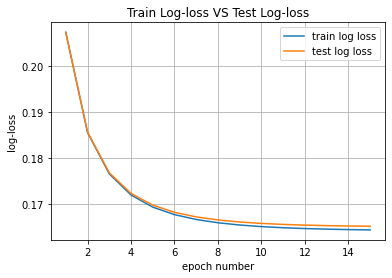

In [19]:
x = [i for i in range(1,16,1)] 

plt.plot(x, log_loss_train, label='train log loss') 
plt.plot(x, log_loss_test, label='test log loss')

plt.xlabel('epoch number')
plt.ylabel('log-loss')
plt.title('Train Log-loss VS Test Log-loss')
plt.grid()
plt.legend()
plt.show()

In [20]:
def pred(w,b, X):
    
    N = len(X)
    
    predict = [] 

    for i in range(N):     
        z=np.dot(w,X[i])+b
        
        if sigmoid(z) >= 0.5: 
            predict.append(1) 

        else:
            predict.append(0) 

            
    return np.array(predict)


print('Accuracy score for Train data is - ')

print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))

print('Accuracy score for Test data is - ')

print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test)) 

Accuracy score for Train data is - 
0.9506666666666667
Accuracy score for Test data is - 
0.94768
